In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
# Creamos la clase LinearRegression

class LinearRegression():
    
    # constructor para inicializar los pesos y el bias
    
    def __init__(self):
        
        # la clase tiene tres atributos, los pesos, el bias y un atributo
        # llamado history, el cual tendrá los valores de la función de perdida
        # obtenidos en cada época. Todos los atributos se inician con un valor nulo
        
        self.weights = None
        self.bias = None
        self.history = None
        
    # metodo predict para realiza predicciones
        
    def predict(self,X):
        
        y_pred = X.dot(self.weights) + self.bias
        
        return y_pred
    
    
    # metodo loss, calcula el valor de la función de pérdida
    
    def loss(self,X,y):
        
        n = y.shape[0]
        
        y_pred = self.predict(X)
        
        return (1/(2*n))*np.sum((y-y_pred)**2) 
    
    # metodo gradient, calcula la derivada con respecto a peso y la derivada con respecto al bias
    
    def gradient(self,X,y):
        
        # n es el número de renglones de la matriz X
        
        n = X.shape[0]
        
        # vector de tamaño n que contiene un 1 en cada entrada
        
        O = np.ones((n,1))
        
        y_pred = self.predict(X)
        
        # Derivada con respecto a los pesos
    
        DW = (-1/n)*(X.T).dot((y-y_pred)) 
        
        # Derivada con respecto al bias
        
        Db = (-1/n)*(O.T).dot((y-y_pred))
    
        return DW , Db

                   
        
    # metdo fit para ajustar el modelo a un conjunto de datos
    
    def fit(self,X,y,epochs=1,batch_size=1,lr=0.001,val_data=None,seed=None):
        
        # n = número de observaciones
        # p = número de características
        
        n = X.shape[0]
        p = X.shape[1]
        
        # Semilla aleatoria
        
        np.random.seed(seed)
        
        # inicialización de los pesos y los bias
        
        self.weights = np.random.normal(size=(p,1))
        
        self.bias = np.random.normal(size=(1,1))
        
        
        self.history = {'loss':[]}
        
        if val_data != None:
            
            self.history['val_loss'] = []
        
        for i in range(epochs):
            
            sample = np.random.choice(n,batch_size,replace=False)
            
            X_batch = X[sample,:]
            y_batch = y[sample,:]
            
            DW, Db = self.gradient(X_batch,y_batch)
            
            self.weights = self.weights - lr*DW
            
            self.bias = self.bias - lr*Db
            
            self.history['loss'].append(self.loss(X,y))
            
            if val_data != None:
                
                y_val_pred = self.predict(val_data[0])
                
                self.history['val_loss'].append(self.loss(val_data[0],val_data[1]))

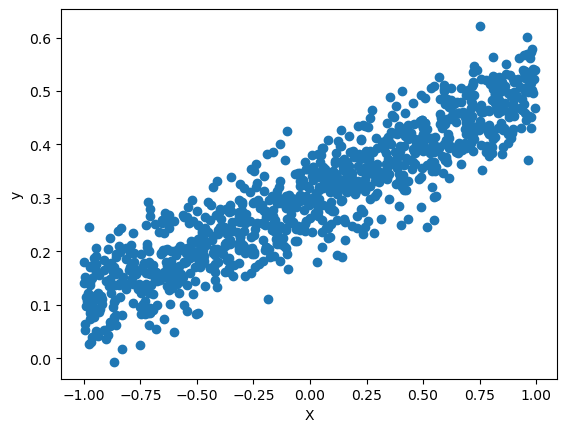

In [135]:
n = 1000

np.random.seed(1)

w = 0.2
b = 0.3

X = np.random.uniform(-1,1,size=(n,1))
e = np.random.normal(scale=0.05,size=(n,1))

y = 0.2*X + b + e


plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

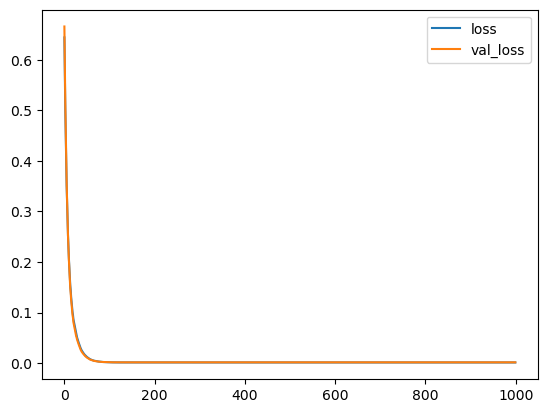

In [170]:
train_size = round(X.shape[0]*0.8)

X_train = X[:train_size]
y_train = y[:train_size] 

val_data = (X[train_size:],y[train_size:])

lr = LinearRegression()

lr.fit(X_train,y_train,epochs=500,batch_size=50,lr=0.1,val_data=val_data,seed=1)

df = pd.DataFrame(lr.history)

df.plot(kind='line')
plt.show()

In [171]:
print('train mse : {:.5f}'.format(lr.loss(X_train,y_train)))

train mse : 0.00124


In [172]:
print('val mse : {:.5f}'.format(lr.loss(val_data[0],val_data[1])))

val mse : 0.00152


In [173]:
weight = float(lr.weights)
bias = float(lr.bias)
print('Fitted equation : {:.3f}X + {:.3f}'.format(weight,bias))

Fitted equation : 0.197X + 0.302


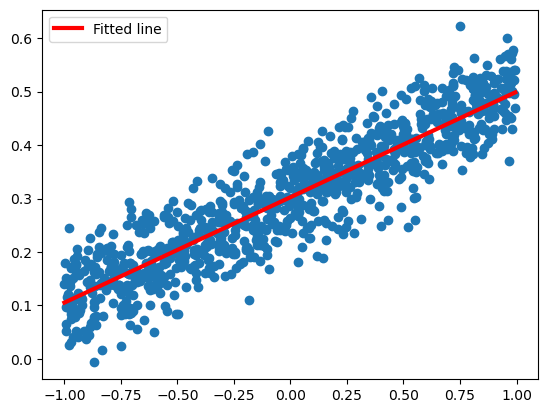

In [174]:

X_sort = np.sort(X,axis=0)

y_pred = lr.predict(X_sort)

plt.scatter(X,y)
plt.plot(X_sort,y_pred,label='Fitted line',c='r',linewidth=3)
plt.legend()
plt.show()